In [2]:
!pip install git+https://github.com/fastai/fastai2 
!pip install git+https://github.com/fastai/fastcore

  Cloning https://github.com/fastai/fastai2 to /tmp/pip-req-build-63etxky0
  Running command git clone -q https://github.com/fastai/fastai2 /tmp/pip-req-build-63etxky0
  Created wheel for fastai2: filename=fastai2-0.0.14-cp36-none-any.whl size=182069 sha256=9020ccc52b980c374457f80a0aae8ee60660fa6a2b5ca0653b7ffcb880d260ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-us9lpaws/wheels/a1/59/9a/50335b36924b827e29d5f40b41fc3a008cc1f30dd80e560dfd
Successfully built fastai2
  Cloning https://github.com/fastai/fastcore to /tmp/pip-req-build-0ujrghbz
  Running command git clone -q https://github.com/fastai/fastcore /tmp/pip-req-build-0ujrghbz
  Created wheel for fastcore: filename=fastcore-0.1.16-cp36-none-any.whl size=27828 sha256=54c96484766020276393499fc688f0e67e381dad178bf415a299f6abd2daf1ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-f7kwwtng/wheels/8a/2a/23/bc50c8f5e28776b44ac837a01fcfa675724565d4813d8e51c7
Successfully built fastcore
  Found existing installation: fastcore 0.1.

In [6]:
from fastai2.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.176911,0.024464,0.006089,34:29


epoch,train_loss,valid_loss,error_rate,time
0,0.059947,0.025419,0.006766,49:38


In [0]:
from fastai2.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [0]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.178990,0.040377,0.009472,34:06


epoch,train_loss,valid_loss,error_rate,time
0,0.055877,0.023677,0.007442,50:05


In [3]:
from fastai2.vision.all import *
doc(cnn_learner)

cnn_learner(dls, arch, loss_func=None, pretrained=True, cut=None, splitter=None, y_range=None, config=None, n_out=None, normalize=True, opt_func=<function Adam at 0x7f889faa9400>, lr=0.001, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))
Build a convnet style learner from `dls` and `arch`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [4]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,2.890888,2.171712,01:04


epoch,train_loss,valid_loss,time
0,1.774886,1.303997,01:10
1,1.532316,1.169110,01:10


epoch,train_loss,valid_loss,time
0,1.416416,1.991991,01:07


epoch,train_loss,valid_loss,time
0,1.387626,1.136194,01:09
1,1.246152,0.909927,01:09
2,1.110325,0.783234,01:09
3,1.001200,0.730839,01:09
4,0.909800,0.714955,01:09
5,0.838608,0.693906,01:09


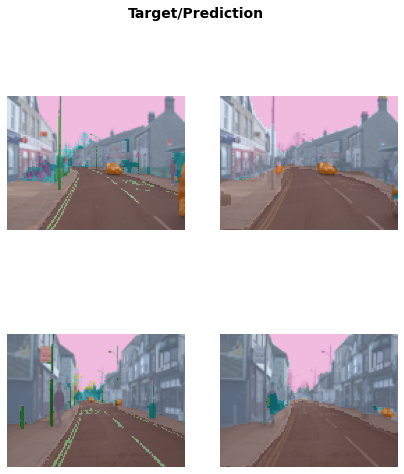

In [5]:
learn.fine_tune(6)
learn.show_results(max_n=6, figsize=(7,8))

In [7]:
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.579355,0.398657,0.819200,2:53:55


epoch,train_loss,valid_loss,accuracy,time
0,0.269210,0.224856,0.911120,6:46:29


In [8]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0285, 0.9715]))

In [9]:
doc(learn.predict)

Learner.predict(item, rm_type_tfms=None, with_input=False)
Return the prediction on `item`, fully decoded, loss function decoded and probabilities

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [10]:
from fastai2.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)


In [11]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.359653,0.373364,0.822482,00:06
1,0.363123,0.361313,0.831849,00:05
2,0.346204,0.356691,0.834152,00:06


In [12]:
from fastai2.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.522562,1.406754,00:00


epoch,train_loss,valid_loss,time
0,1.383152,1.351160,00:00
1,1.275915,1.178681,00:00
2,1.042689,0.873421,00:00
3,0.818516,0.727148,00:00
4,0.698201,0.690003,00:00
5,0.644332,0.677176,00:00
6,0.622425,0.671186,00:00
7,0.598944,0.668290,00:00
8,0.601968,0.667218,00:00
9,0.597183,0.667002,00:00


In [13]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,53.0,14.0,4.5,4.622973
1,4.0,39.0,4.5,3.957715
2,75.0,52.0,5.0,4.032003
3,36.0,19.0,3.0,2.729781
4,28.0,77.0,4.0,3.191305
5,68.0,49.0,3.0,3.972100
6,19.0,23.0,2.0,3.137262
7,44.0,77.0,4.0,4.072456
8,82.0,41.0,5.0,4.105668


1.    Do you need these for deep learning?

·         Lots of math T / F

·         Lots of data T / F

·         Lots of expensive computers T / F

·         A PhD T / F

 

2.    Name five areas where deep learning is now the best in the world.

Computer vision
Recommendation engine,
Sound classification
Natural language processing
many kinds of predictive analysis
 

3.    What was the name of the first device that was based on the principle of the artificial neuron?

The Mark I Perceptron
 

4.    Based on the book of the same name, what are the requirements for "Parallel Distributed Processing"?

A set of processing units
A state of activation
An output function for each unit
A pattern of connectivity among units
A propagation rule for propagating patterns of activities through the network of connectivities
An activation rule for combining the inputs impinging on a unit with the current state of that unit to produce a new level of activation for the unit
A learning rule whereby patterns of connectivity are modified by experience
An environment within which the system must operate
 

5.    What were the two theoretical misunderstandings that held back the field of neural networks?

Failure to recognize that multilayer perceptrons could handle critical mathematical functions
Not understanding the need for more than two layers
 

6.    What is a GPU?

A graphical processing unit, a specialized chip for quickly adding and multiplying numbers
 

7.    Open a notebook and execute a cell containing: 1+1. What happens?

It outputs 2
 

8.    Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.
See above

9.    Complete the Jupyter Notebook online appendix.
See below

10.  Why is it hard to use a traditional computer program to recognize images in a photo?

It is very difficult to explicitly program to the computer what a person or a cat or a dog looks like
 

11.  What did Samuel mean by "Weight Assignment"?

A way for the computer to evaluate the importance of various inputs, what is now called parameters
 

12.  What term do we normally use in deep learning for what Samuel called "Weights"?

A multiplication factor for each of the inputs
 

13.  Draw a picture that summarizes Arthur Samuel's view of a machine learning model



 

 

14.  Why is it hard to understand why a deep learning model makes a particular prediction?

Because the prediction involves
 

15.  What is the name of the theorem that a neural network can solve any mathematical problem to any level of accuracy?

Universal Approximation Theorem

16.  What do you need in order to train a model?

A dataset (divided into training, testing and validation sets), labels, a model architecture and loss function.

17.  How could a feedback loop impact the rollout of a predictive policing model?

If the results of the model are fed back into the model by telling the police where to go, it will produce a feedback loop. Police can only arrest people where they are, so the more often a model sends them to a given location, the more arrests they will make there, thereby encouraging the model to send them there more often.

18.  Do we always have to use 224x224 pixel images with the cat recognition model?

Yes, for historical reasons
 

19.  What is the difference between classification and regression?

Classification predicts a category. Regression predicts a number.
 

20.  What is a validation set? What is a test set? Why do we need them?

21.  What will fastai do if you don't provide a validation set?

fastai will create a validation set with 20% of the data

22.  Can we always use a random sample for a validation set? Why or why not?

We cannot always use a random sample because in some cases data from the training set may “leak” into the validation set
 

23.  What is overfitting? Provide an example.

When the model starts memorizing the training set, at the expense of accuracy in the test and validation set
Example of overfitting

24.  What is a metric? How does it differ to "loss"?

A metric helps humans understand the performance of a given model, while loss is the way a computer measures performance.

25.  How can pretrained models help?

For many problems (such as image recognition and natural language processing), pretrained models provide a headstart in solving the last portion, such as distinguishing cats from dogs or positive and negative movie reviews.

26.  What is the "head" of a model?

The last part of a pretrained model, which is what's being trained.

27.  What kinds of features do the early layers of a CNN find? How about the later layers?

Edges and simple shapes

28.  Are image models only useful for photos?

No. They can even work for abstract representations, such as soudns and user behavior.

29.  What is an "architecture"?

A template for a model

30.  What is segmentation?

Classification of individual pixels in an image

31.  What is y_range used for? When do we need it?

If all results are between a low and a high, this helps the model produce results in that range.

32.  What are "hyperparameters"?

Numbers to help the computer iterate the model to improve performace (training the model)

33.  What's the best way to avoid failures when using AI in an organization?

Understanding what validation and test sets are and how to use them.

In [0]:
# Import necessary libraries
#from fastai2.vision.all import * 
import matplotlib.pyplot as plt

In [0]:
from PIL import Image

In [4]:
a = 1
b = a + 1
c = b + a + 1
d = c + b + a + 1
a, b, c ,d

(1, 2, 4, 8)

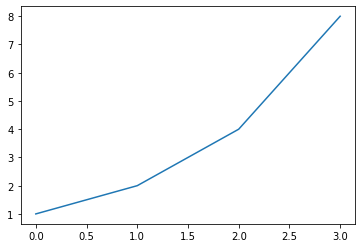

In [5]:
plt.plot([a,b,c,d])
plt.show()